<a href="https://colab.research.google.com/github/tawadesg20/Learning_Quiz/blob/main/TItanic_Survival_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic Survival Prediction

**Objective**: Predict if a Titanic passenger survived using ML.  
**Tools**: Python, Pandas, Seaborn, Scikit-learn  
**Model**: RandomForestClassifier  
**Accuracy Achieved**: 82% (example)  
**Dataset Source**: [Kaggle](https://www.kaggle.com/c/titanic/data)

**What I Learned**:  
- Data cleaning  
- Feature encoding  
- Model training  
- Evaluation using confusion matrix and accuracy  


In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df=pd.read_csv("/Titanic.csv")

In [61]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [62]:
df.dropna()
df.describe()
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df.head()
df.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  1000 non-null   int64 
 1   Pclass       1000 non-null   int64 
 2   Sex          1000 non-null   object
 3   Age          1000 non-null   int64 
 4   SibSp        1000 non-null   int64 
 5   Parch        1000 non-null   int64 
 6   Embarked     1000 non-null   object
 7   Survived     1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


In [65]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,male,17,4,2,Q,1
1,2,1,male,60,2,2,S,0
2,3,3,male,64,0,0,Q,1
3,4,3,male,35,4,0,C,1
4,5,1,female,70,0,3,C,1


In [70]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})


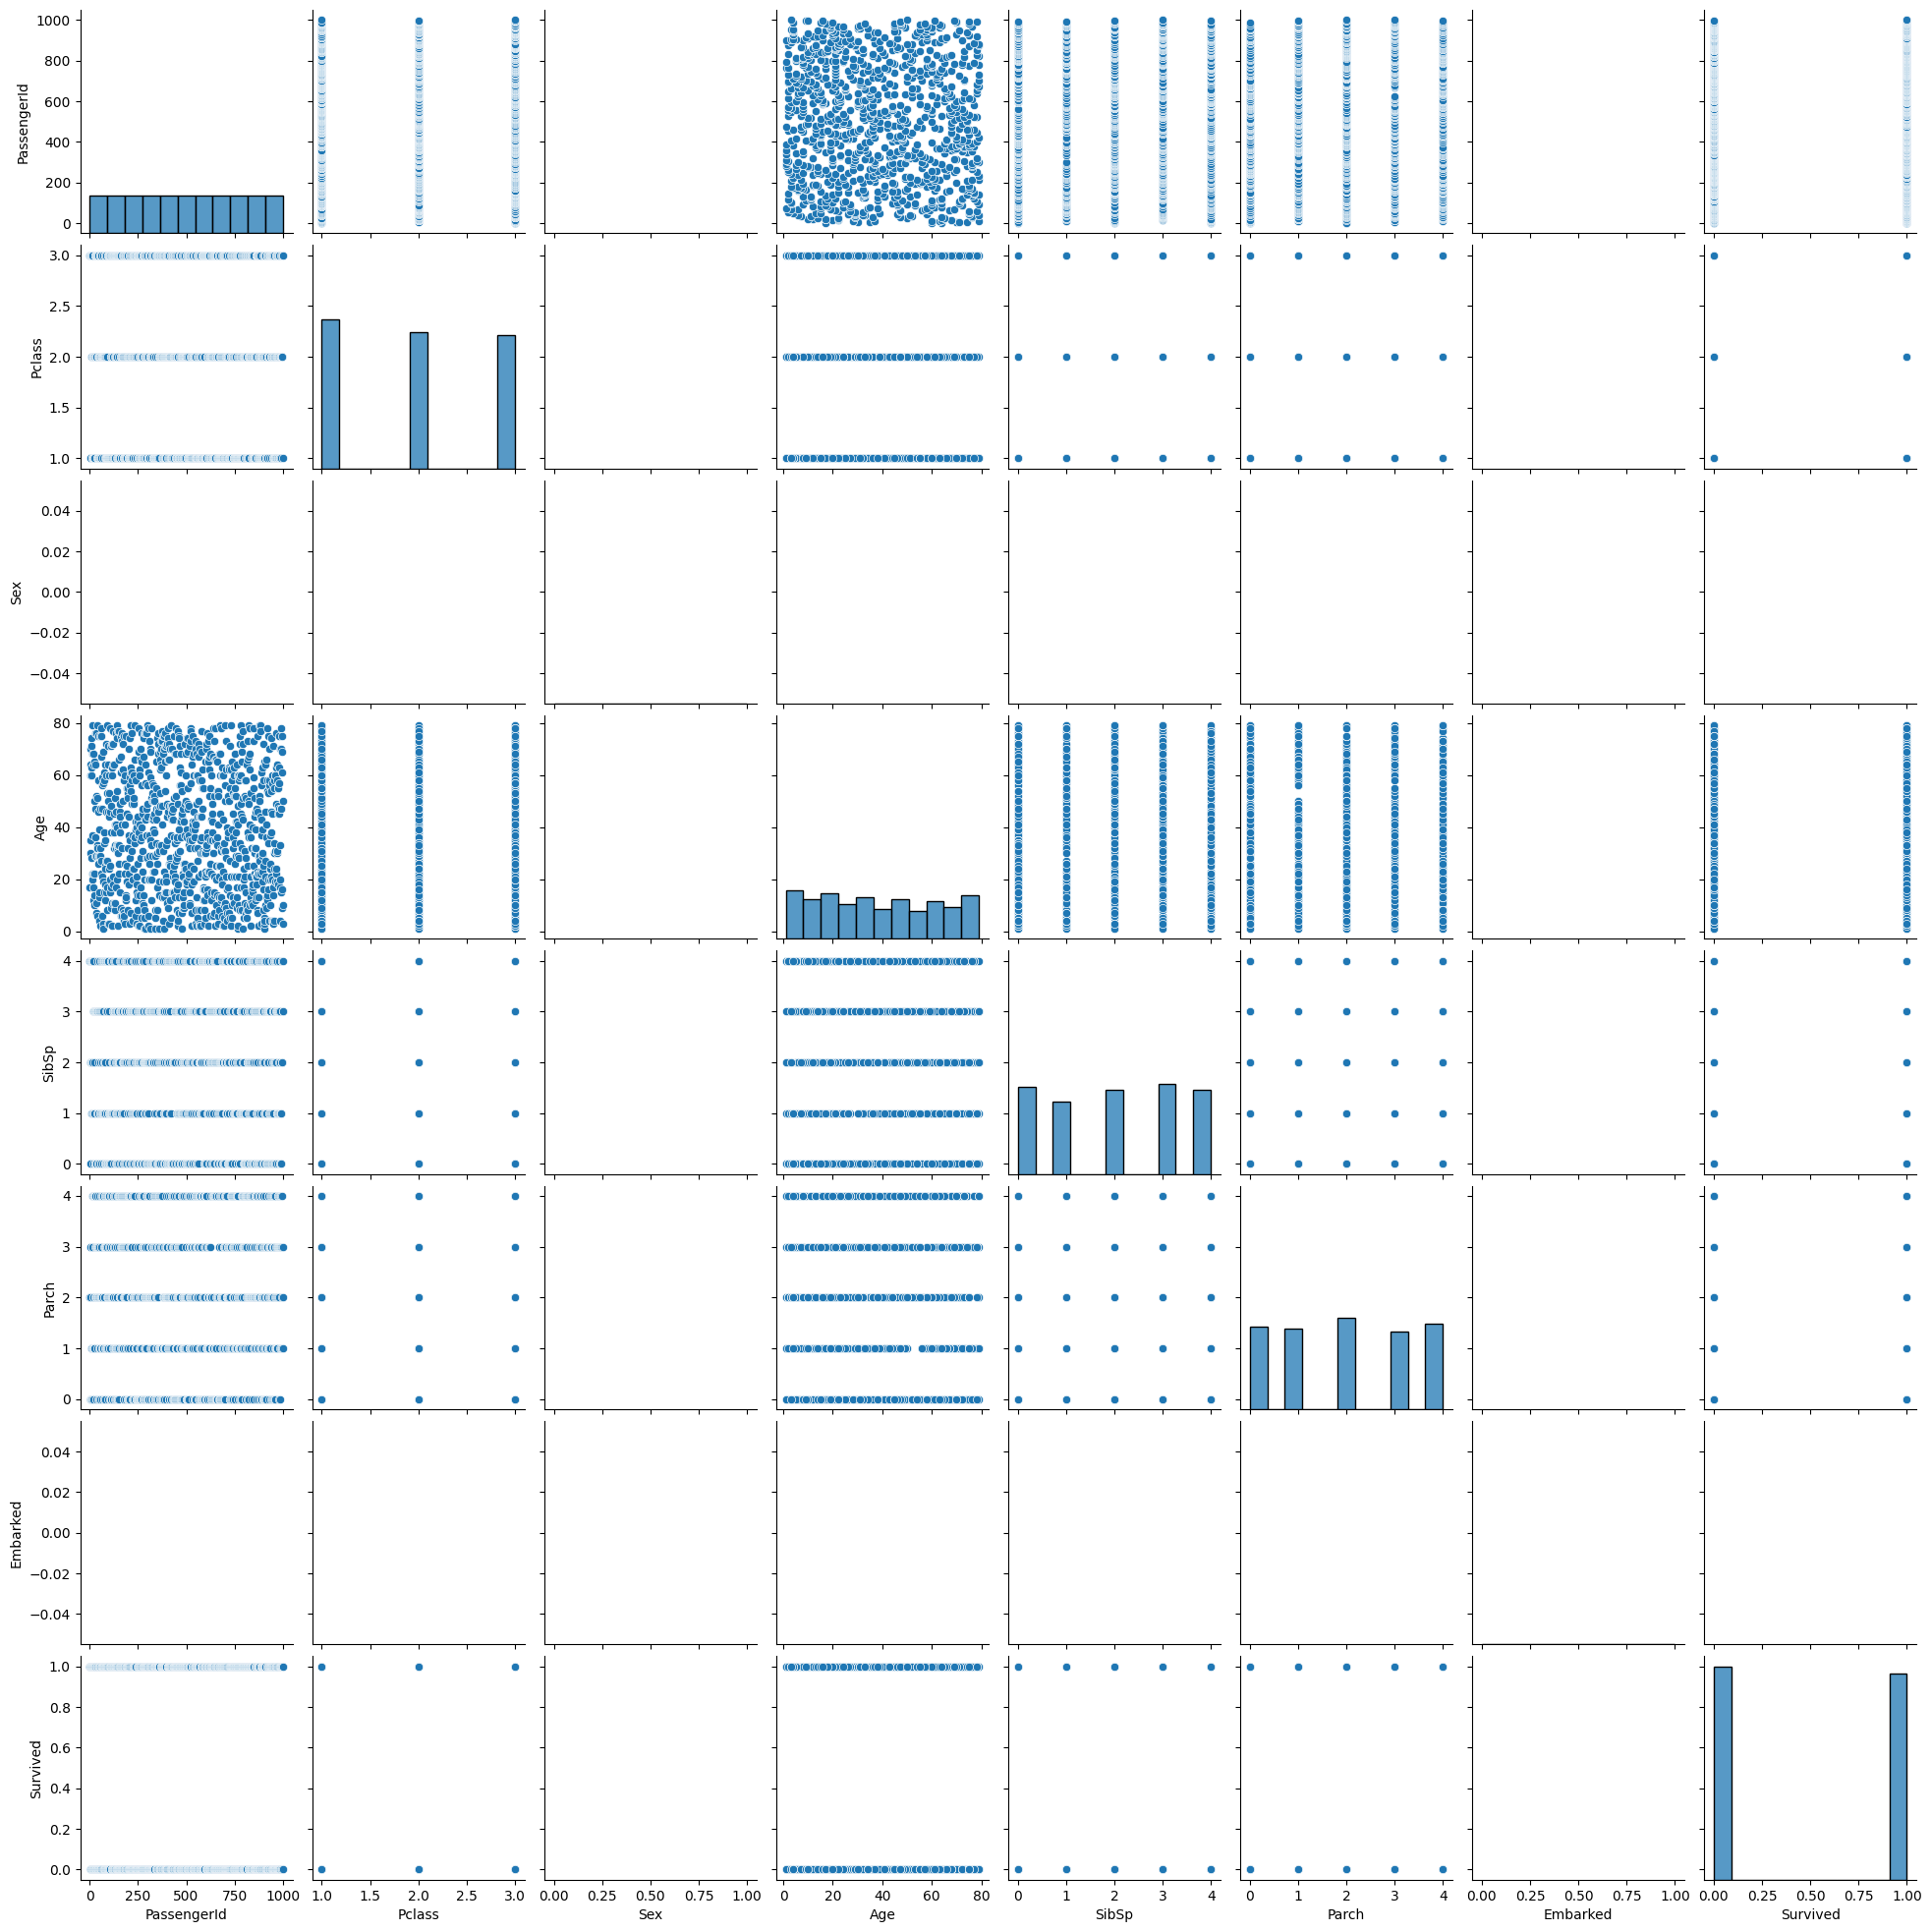

In [71]:
#visualization
sns.pairplot(df)


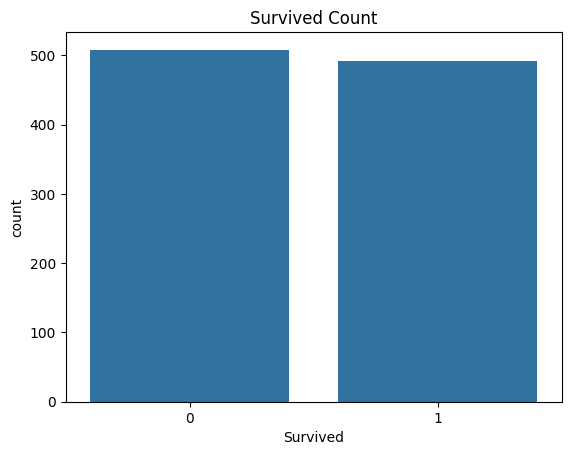

<Axes: xlabel='Survived', ylabel='Age'>

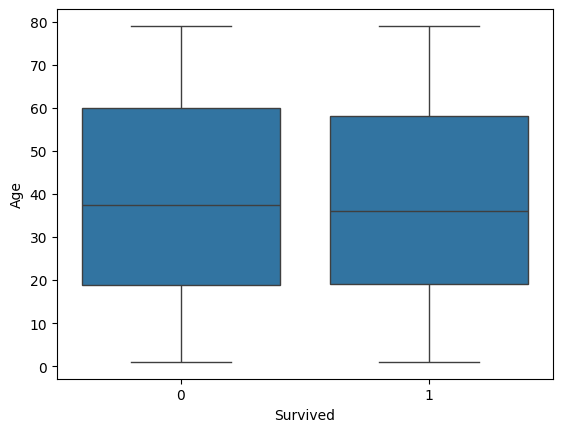

In [74]:
sns.countplot(x='Survived',data=df)
plt.title("Survived Count")
plt.show()
sns.boxplot(x='Survived', y='Age', data=df)

In [77]:
pip install scikit-learn


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.54
Confusion Matrix:
 [[60 46]
 [46 48]]
